# Exploring the problem space

In [405]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from shapely import Polygon
import seaborn as sns
import numpy as np
import pandas as pd

from pprint import pprint


In [61]:
polygons_part2 = (((2483411, 4366013), (2946441, 3902983), (2483411, 3439953), (2020381, 3902983)),
((3429446, 1422045), (4547776, 303715), (3429446, -814615), (2311116, 303715)),
((666423, 4945537), (2548197, 3063763), (666423, 1181989), (-1215351, 3063763)),
((3021606, 697987), (3573987, 145606), (3021606, -406775), (2469225, 145606)),
((2707326, 3222892), (3333325, 2596893), (2707326, 1970894), (2081327, 2596893)),
((3103704, 2552295), (4095657, 1560342), (3103704, 568389), (2111751, 1560342)),
((3497040, 3154324), (3633297, 3018067), (3497040, 2881810), (3360783, 3018067)),
((1708530, 2842879), (3696396, 855013), (1708530, -1132853), (-279336, 855013)),
((3107437, 3704147), (3548119, 3263465), (3107437, 2822783), (2666755, 3263465)),
((2155249, 2889139), (2568192, 2476196), (2155249, 2063253), (1742306, 2476196)),
((3447897, 3163243), (3540290, 3070850), (3447897, 2978457), (3355504, 3070850)),
((2643048, 3987254), (3239506, 3390796), (2643048, 2794338), (2046590, 3390796)),
((3533132, 4366934), (4220678, 3679388), (3533132, 2991842), (2845586, 3679388)),
((3683790, 3204484), (3870374, 3017900), (3683790, 2831316), (3497206, 3017900)),
((1943208, 4373598), (2486300, 3830506), (1943208, 3287414), (1400116, 3830506)),
((3940100, 5237258), (5197705, 3979653), (3940100, 2722048), (2682495, 3979653)),
((3789719, 1554453), (4118434, 1225738), (3789719, 897023), (3461004, 1225738)),
((3939775, 1312639), (4674033, 578381), (3939775, -155877), (3205517, 578381)),
((3880152, 4009972), (4562727, 3327397), (3880152, 2644822), (3197577, 3327397)),
((3280639, 3234467), (4068631, 2446475), (3280639, 1658483), (2492647, 2446475)),
((2348869, 2683288), (2791783, 2240374), (2348869, 1797460), (1905955, 2240374)),
((3727441, 3112211), (4042196, 2797456), (3727441, 2482701), (3412686, 2797456)),
((3973153, 2989433), (4927641, 2034945), (3973153, 1080457), (3018665, 2034945)),
((38670, 2246437), (1499551, 785556), (38670, -675325), (-1422211, 785556)),
((3181909, 3333197), (3652146, 2862960), (3181909, 2392723), (2711672, 2862960)),
((3099490, 4396648), (3549912, 3946226), (3099490, 3495804), (2649068, 3946226)),)

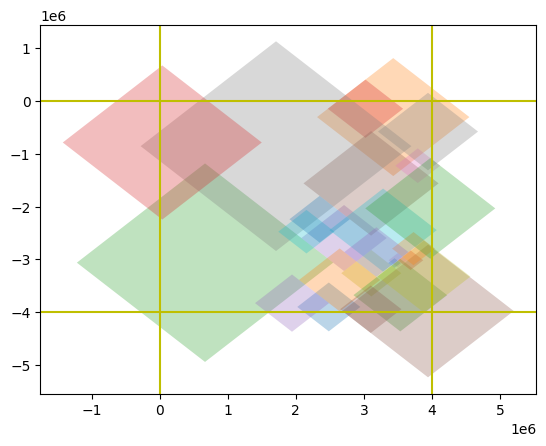

In [168]:
plt.figure()
for p in polygons_part2:
    coord = list(p)
    xs, ys = zip(*coord)
    ys = [-y for y in ys]
    plt.fill(xs, ys, alpha=0.3)
    
plt.axvline(x=0, c='y')
plt.axvline(x=4_000_000, c='y')
plt.axhline(y=0, c='y')
plt.axhline(y=-4000000, c='y')

# visualize answer given by geopandas

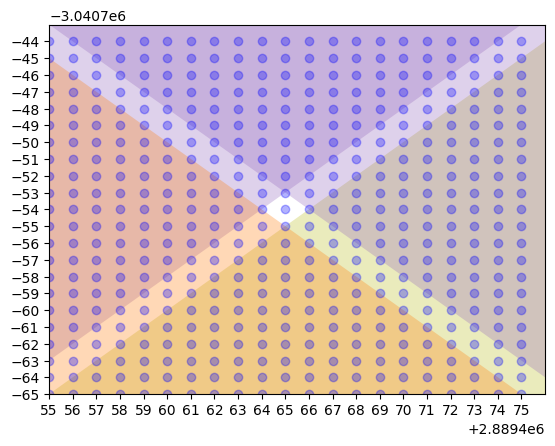

In [450]:
# With points found by geopandas
x_min = 2889465 - 10
y_min = 3040753 - 10
x_max = 2889466 + 10
y_max = 3040755 + 10

plt.figure()
for p in polygons_part2:
    coord = list(p)
    xs, ys = zip(*coord)
    ys = [-y for y in ys]
    plt.fill(xs, ys, alpha=0.3)
    
dots = ((x, y) for y in range(-y_max, -y_min) for x in range(x_min, x_max))
dots_x, dots_y = zip(*dots)
plt.scatter(dots_x, dots_y, c='blue', alpha=0.3)

plt.xticks(range(x_min, x_max))
plt.yticks(range(-y_max, -y_min))
plt.axis([x_min, x_max, -y_max, -y_min])
plt.show()

I figured out the coordinates, but also got a cool optical illusion

Anyway, it's the point (x=2,889,465, y=3,040,754)

In [457]:
# Its tuning frequency, which can be found by multiplying 
# its x coordinate by 4000000 and then adding its y coordinate.

ans = 2_889_465 * 4_000_000 + 3_040_754
ans

11557863040754

## Visualize Part 1

In [63]:
polygons_part1 = (((2, 25), (9, 18), (2, 11), (-5, 18)),
((9, 17), (10, 16), (9, 15), (8, 16)),
((13, 5), (16, 2), (13, -1), (10, 2)),
((12, 18), (16, 14), (12, 10), (8, 14)),
((10, 24), (14, 20), (10, 16), (6, 20)),
((14, 22), (19, 17), (14, 12), (9, 17)),
((8, 16), (17, 7), (8, -2), (-1, 7)),
((2, 10), (12, 0), (2, -10), (-8, 0)),
((0, 14), (3, 11), (0, 8), (-3, 11)),
((20, 22), (28, 14), (20, 6), (12, 14)),
((17, 26), (23, 20), (17, 14), (11, 20)),
((16, 12), (21, 7), (16, 2), (11, 7)),
((14, 4), (15, 3), (14, 2), (13, 3)),
((20, 8), (27, 1), (20, -6), (13, 1)),)

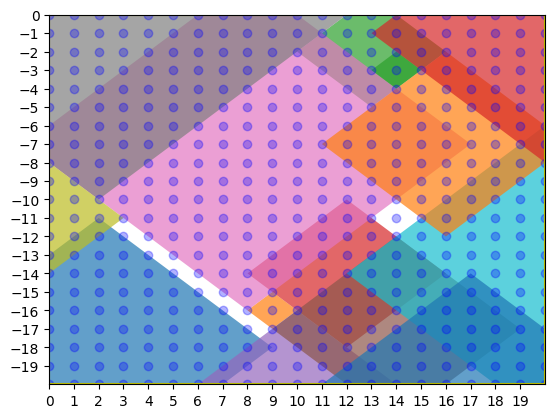

In [269]:
plt.figure()
for p in polygons_part1:
    coord = list(p)
    xs, ys = zip(*coord)
    ys = [-y for y in ys]
    plt.fill(xs, ys, alpha=0.7)
    
plt.axvline(x=0, c='y')
plt.axvline(x=20, c='y')
plt.axhline(y=0, c='y')
plt.axhline(y=-20, c='y')


dots = ((x, y) for y in range(0, -25, -1) for x in range(25))
dots_x, dots_y = zip(*dots)
plt.scatter(dots_x, dots_y, c='blue', alpha=0.3)

plt.xticks(range(0, 20, 1))
plt.yticks(range(0, -20, -1))
plt.axis([0, 20, -20, 0])



plt.show()

# plotly

In [461]:
xs, ys = [], []
for p in polygons_part2:
    coord = list(p)
    coord.append(coord[0])
    xs_p, ys_p = zip(*coord)
    ys_p = [-y for y in ys_p]
    xs.extend([*xs_p, None])
    ys.extend([*ys_p, None])
fig = go.Figure(go.Scatter(x=xs, 
                           y=ys, 
                           fill='toself',
                           fillcolor='pink', 
                           cliponaxis=True, 
                           opacity=1))

fig.update_xaxes(range=[0, 4000000])
fig.update_yaxes(range=[0, -4000000])
fig.show()

In [383]:
from shapely.ops import unary_union
import geopandas as gpd
import shapely

In [384]:
polys = [shapely.Polygon(p) for p in polygons_part2]

In [385]:
boundary = gpd.GeoSeries(unary_union(polys))

<AxesSubplot: >

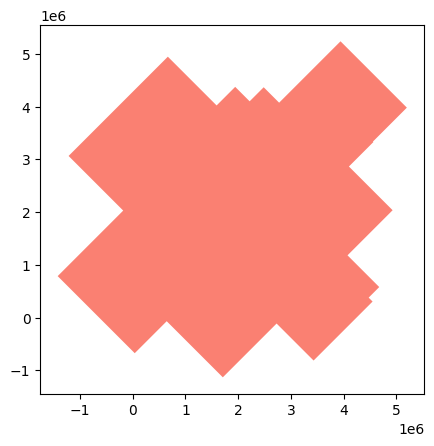

In [386]:
boundary.plot(color='salmon')

In [387]:
x = gpd.GeoSeries(Polygon(((0, 0), (4e6, 0), (4e6, 4e6), (0, 4e6))))

In [388]:
boundary.contains(x)

0    False
dtype: bool

<AxesSubplot: >

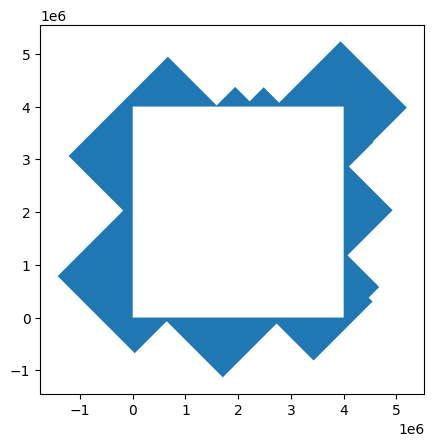

In [389]:
boundary.difference(x).plot()

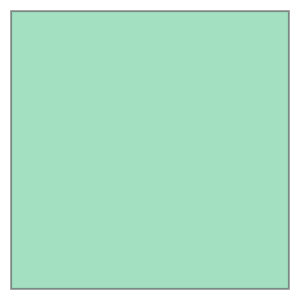

In [464]:
boundary.clip_by_rect(0, 0, 4e6, 4e6)[0]

In [417]:
pd.read_json(foo)

ValueError: All arrays must be of the same length

In [460]:
foo

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[0.0, 0.0], [0.0, 4000000.0], [4000000.0, 4000000.0], [4000000.0, 0.0], [0.0, 0.0]], [[2889465.0, 3040755.0], [2889464.0, 3040754.0], [2889465.0, 3040753.0], [2889466.0, 3040754.0], [2889465.0, 3040755.0]]]}, "bbox": [0.0, 0.0, 4000000.0, 4000000.0]}], "bbox": [0.0, 0.0, 4000000.0, 4000000.0]}'